# Мартьянова Александра Евгеньевна, курс «Data Science», ВКР

# Часть 2. Модели Data Science

### Загрузка библиотек

In [1]:
# Загрузка библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

### 1. Подготовка и предобработка данных

Для обработки следует оставить первые 23 строки, поскольку остальные строки состоят из случайных чисел с нормальным распределением, недостающие данные получены путем интерполяции данных специально подготовленного датасета

###### Датасет со свойствами композитов

Загрузка специально подготовленного датасета для дальнейшей интерполяции:

In [2]:
# Загрузка в объект DataFrame файла 'X_bp&X_nup.xlsx', метод read_excel
df_s = pd.read_excel('X_bp&X_nup.xlsx', index_col = 0)
df_s.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                              NaN               NaN                    NaN   
2                              NaN               NaN                    NaN   
3                              NaN               NaN                    NaN   
4                              NaN               NaN                    NaN   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.0                        22.267857   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                     100.0                          210.0   
1                       NaN                            NaN   
2                       NaN                            NaN   
3                       NaN                            NaN   
4                       NaN                            NaN   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                   NaN                            NaN   
2                                   NaN                            NaN   
3                                   NaN                            NaN   
4                                   NaN                            NaN   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                      NaN                   0          NaN                NaN  
2                      NaN                   0          NaN                NaN  
3                      NaN                   0          NaN                NaN  
4                      NaN                   0          NaN                NaN

In [3]:
# Вывод сведений о новом объекте DataFrame df_s, метод info()
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1100
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       23 non-null     float64
 1   Плотность, кг/м3                      23 non-null     float64
 2   модуль упругости, ГПа                 23 non-null     float64
 3   Количество отвердителя, м.%           23 non-null     float64
 4   Содержание эпоксидных групп,%_2       23 non-null     float64
 5   Температура вспышки, С_2              23 non-null     float64
 6   Поверхностная плотность, г/м2         23 non-null     float64
 7   Модуль упругости при растяжении, ГПа  23 non-null     float64
 8   Прочность при растяжении, МПа         23 non-null     float64
 9   Потребление смолы, г/м2               23 non-null     float64
 10  Угол нашивки, град                    1101 non-null   int64  
 11  Шаг нашивки      

In [4]:
# Изменение типа данных индекса, метод astype('int')
df_s.index = df_s.index.astype('int')
df_s

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143            2030.0   
1                                 NaN               NaN   
2                                 NaN               NaN   
3                                 NaN               NaN   
4                                 NaN               NaN   
...                               ...               ...   
1096                              NaN               NaN   
1097                              NaN               NaN   
1098                              NaN               NaN   
1099                              NaN               NaN   
1100                         4.029126            1880.0   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                        30.00   
1                       NaN                          NaN   
2                       NaN                          NaN   
3                       NaN                          NaN   
4                       NaN                          NaN   
...                     ...                          ...   
1096                    NaN                          NaN   
1097                    NaN                          NaN   
1098                    NaN                          NaN   
1099                    NaN                          NaN   
1100             622.000000                       111.86   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                                 NaN                       NaN   
2                                 NaN                       NaN   
3                                 NaN                       NaN   
4                                 NaN                       NaN   
...                               ...                       ...   
1096                              NaN                       NaN   
1097                              NaN                       NaN   
1098                              NaN                       NaN   
1099                              NaN                       NaN   
1100                        22.267857                284.615385   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                             210.0                             70.000000   
1                               NaN                                   NaN   
2                               NaN                                   NaN   
3                               NaN                                   NaN   
4                               NaN                                   NaN   
...                             ...                                   ...   
1096                            NaN                                   NaN   
1097                            NaN                                   NaN   
1098                            NaN                                   NaN   
1099                            NaN                                   NaN   
1100                          470.0                             73.333333   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000                    220.0   
1                               NaN                      NaN   
2                               NaN                      NaN   
3                               NaN                      NaN   
4                               NaN                      NaN   
...                             ...                      ...   
1096                            NaN                      NaN   
1097                            NaN                      NaN   
1098                            NaN                      NaN   
1099                            NaN                      NaN   
1100                    2455.555556                    220.0   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

Индексы - целые числа

In [5]:
# Проверка наличия пропусков типа NULL и NaN в объекте DataFrame, методы isnull(), isna() и sum()
print(df_s.isnull().sum())
print()
print(df_s.isna().sum())

Соотношение матрица-наполнитель         1078
Плотность, кг/м3                        1078
модуль упругости, ГПа                   1078
Количество отвердителя, м.%             1078
Содержание эпоксидных групп,%_2         1078
Температура вспышки, С_2                1078
Поверхностная плотность, г/м2           1078
Модуль упругости при растяжении, ГПа    1078
Прочность при растяжении, МПа           1078
Потребление смолы, г/м2                 1078
Угол нашивки, град                         0
Шаг нашивки                             1078
Плотность нашивки                       1078
dtype: int64

Соотношение матрица-наполнитель         1078
Плотность, кг/м3                        1078
модуль упругости, ГПа                   1078
Количество отвердителя, м.%             1078
Содержание эпоксидных групп,%_2         1078
Температура вспышки, С_2                1078
Поверхностная плотность, г/м2           1078
Модуль упругости при растяжении, ГПа    1078
Прочность при растяжении, МПа           1

Вывод: датасете присутствует большое количество пропусков со значениями 'NaN', эти пропуски необходимо будет заполнить данными в результате интерполяции

In [6]:
# Проверка наличия дубликатов в объекте DataFrame, методы duplicated() и sum()
df_s.duplicated().sum()

1076

Вывод: имеются дубликаты в датасете, которые представляют собой строки с ячеями заполненными в основном 'NaN'

In [7]:
# Определение количества строк и столбцов датасета df_s, метод shape
df_s.shape

(1101, 13)

In [8]:
# Проверка количества уникальных значений в каждом столбце датасета df_s, метод nunique()
df_s.nunique()

Соотношение матрица-наполнитель         14
Плотность, кг/м3                        13
модуль упругости, ГПа                   20
Количество отвердителя, м.%              5
Содержание эпоксидных групп,%_2          4
Температура вспышки, С_2                 3
Поверхностная плотность, г/м2            4
Модуль упругости при растяжении, ГПа     4
Прочность при растяжении, МПа            4
Потребление смолы, г/м2                  3
Угол нашивки, град                       2
Шаг нашивки                              6
Плотность нашивки                        5
dtype: int64

Вывод: в колонке 'Угол нашивки, град' всего два значения, в остальных столбцах больше

In [9]:
# Определение уникальных значений в столбце 'Угол нашивки, град', метод unique()
df_s['Угол нашивки, град'].unique()

array([ 0, 90], dtype=int64)

In [10]:
# Подсчет количества строк по уникальным значениям столбца 'Угол нашивки, град', метод count()
df_s['Угол нашивки, град'][df_s['Угол нашивки, град'] == 0.0].count()

951

In [11]:
print('count, 0 degeree: ', df_s['Угол нашивки, град'][df_s['Угол нашивки, град'] == 0.0].count())
print('count, 90 degeree: ', df_s['Угол нашивки, град'][df_s['Угол нашивки, град'] == 90.0].count())
print('count, 90 degeree, проверка: ', df_s.shape[0] - df_s['Угол нашивки, град'][df_s['Угол нашивки, град'] == 0.0].count())

count, 0 degeree:  951
count, 90 degeree:  150
count, 90 degeree, проверка:  150


In [12]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
df_s.dtypes['Угол нашивки, град']

dtype('int64')

Интерполяция данных:

In [13]:
# интерполяция недостающими данными, метод interpolate библиотеки scipy.interpolate
interpolate_columns = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 
                       'модуль упругости, ГПа', 'Количество отвердителя, м.%', 
                       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 
                       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 
                       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 'Шаг нашивки', 
                       'Плотность нашивки']
for col in interpolate_columns:
    df_s[col] = df_s[col].interpolate(limit_direction = 'both', kind = 'cubic')    

In [14]:
# Вывод первых тридцати значений датасета df_s
df_s.head(30)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                          1.857143            2030.0             738.736842   
1                          1.857143            2030.0             738.736842   
2                          1.857143            2030.0             738.736842   
3                          1.857143            2030.0             738.736842   
4                          1.857143            2030.0             738.736842   
5                          1.857143            2030.0             738.736842   
6                          1.857143            2030.0             738.736842   
7                          1.857143            2030.0             738.736842   
8                          1.857143            2030.0             738.736842   
9                          1.857143            2030.0             738.736842   
10                         1.857143            2030.0             738.736842   
11                         1.857143            2030.0             738.736842   
12                         1.857143            2030.0             738.736842   
13                         1.857143            2030.0             738.736842   
14                         1.857143            2030.0             738.736842   
15                         1.857143            2030.0             738.736842   
16                         1.857143            2030.0             738.736842   
17                         1.857143            2030.0             738.736842   
18                         1.857143            2030.0             738.736842   
19                         1.857143            2030.0             738.736842   
20                         1.857143            2030.0             738.736842   
21                         1.857143            2030.0             738.736842   
22                         1.857143            2030.0             738.736842   
23                         1.857143            2030.0             738.736842   
24                         1.857143            2030.0             738.736842   
25                         1.857143            2030.0             738.736842   
26                         1.857143            2030.0             738.736842   
27                         1.857143            2030.0             738.736842   
28                         1.857143            2030.0             738.736842   
29                         1.857143            2030.0             738.736842   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                          30.0                        22.267857   
1                          30.4                        22.297500   
2                          30.8                        22.327143   
3                          31.2                        22.356786   
4                          31.6                        22.386429   
5                          32.0                        22.416071   
6                          32.4                        22.445714   
7                          32.8                        22.475357   
8                          33.2                        22.505000   
9                          33.6                        22.534643   
10                         34.0                        22.564286   
11                         34.4                        22.593929   
12                         34.8                        22.623571   
13                         35.2                        22.653214   
14                         35.6                        22.682857   
15                         36.0                        22.712500   
16                         36.4                        22.742143   
17                         36.8                        22.771786   
18                         37.2                        22.801429   
19                         37.6                        22.831071   
20                         38.0                        22.860714   
21                         

Проверка качества интерполяции:

In [15]:
pd.set_option('use_inf_as_na', True)
for col in interpolate_columns:
    print(col, 'Inf+Nan: ', df_s[col].isnull().sum())

Соотношение матрица-наполнитель Inf+Nan:  0
Плотность, кг/м3 Inf+Nan:  0
модуль упругости, ГПа Inf+Nan:  0
Количество отвердителя, м.% Inf+Nan:  0
Содержание эпоксидных групп,%_2 Inf+Nan:  0
Температура вспышки, С_2 Inf+Nan:  0
Поверхностная плотность, г/м2 Inf+Nan:  0
Модуль упругости при растяжении, ГПа Inf+Nan:  0
Прочность при растяжении, МПа Inf+Nan:  0
Потребление смолы, г/м2 Inf+Nan:  0
Шаг нашивки Inf+Nan:  0
Плотность нашивки Inf+Nan:  0


In [16]:
# Описательная статистика датасета df_s, метод describe()
df_s.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1101.000000       1101.000000   
mean                          2.918634       1979.750227   
std                           0.783850         62.279796   
min                           1.598174       1880.000000   
25%                           2.327459       1926.400000   
50%                           2.884130       1973.400000   
75%                           3.494317       2030.000000   
max                           4.897959       2160.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1101.000000                  1101.000000   
mean              741.334528                   113.681589   
std               287.558268                    24.568710   
min               205.000000                    30.000000   
25%               549.160000                   111.860000   
50%               738.736842                   123.515200   
75%               799.920000                   129.000000   
max              1628.000000                   129.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1101.000000               1101.000000   
mean                         22.267857                288.723538   
std                           2.041260                 25.239693   
min                          21.250000                100.000000   
25%                          21.250000                284.615385   
50%                          21.575714                296.000000   
75%                          22.267857                300.000000   
max                          33.000000                300.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1101.000000                           1101.000000   
mean                      475.785649                             73.407508   
std                       287.199572                              2.969528   
min                       210.000000                             70.000000   
25%                       210.000000                             70.000000   
50%                       380.000000                             73.333333   
75%                       644.600000                             75.720000   
max                      1010.000000                             78.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1101.000000              1101.000000   
mean                     2443.440307               220.000000   
std                       460.449280                50.335168   
min                      1800.000000               120.000000   
25%                      2000.000000               220.000000   
50%                      2455.555556               220.000000   
75%                      3000.000000               231.200000   
max                      3000.000000               300.000000   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1101.000000  1101.000000        1101.000000  
mean            12.261580     6.543143          55.843324  
std             30.887901     2.491736          11.484472  
min              0.000000     0.000000           0.000000  
25%              0.000000     4.080000          52.600000  
50%              0.000000     7.000000          58.080000  
75%              0.000000     9.000000          62.000000  
max             90.000000    10.000000          70.000000

In [17]:
# Проверка наличия дубликатов в объекте DataFrame, методы duplicated() и sum()
df_s.duplicated().sum()

0

Выводо: дубликаты отсутствуют

###### Построим графики рассеяния, распределия переменных и "ящики с усами"

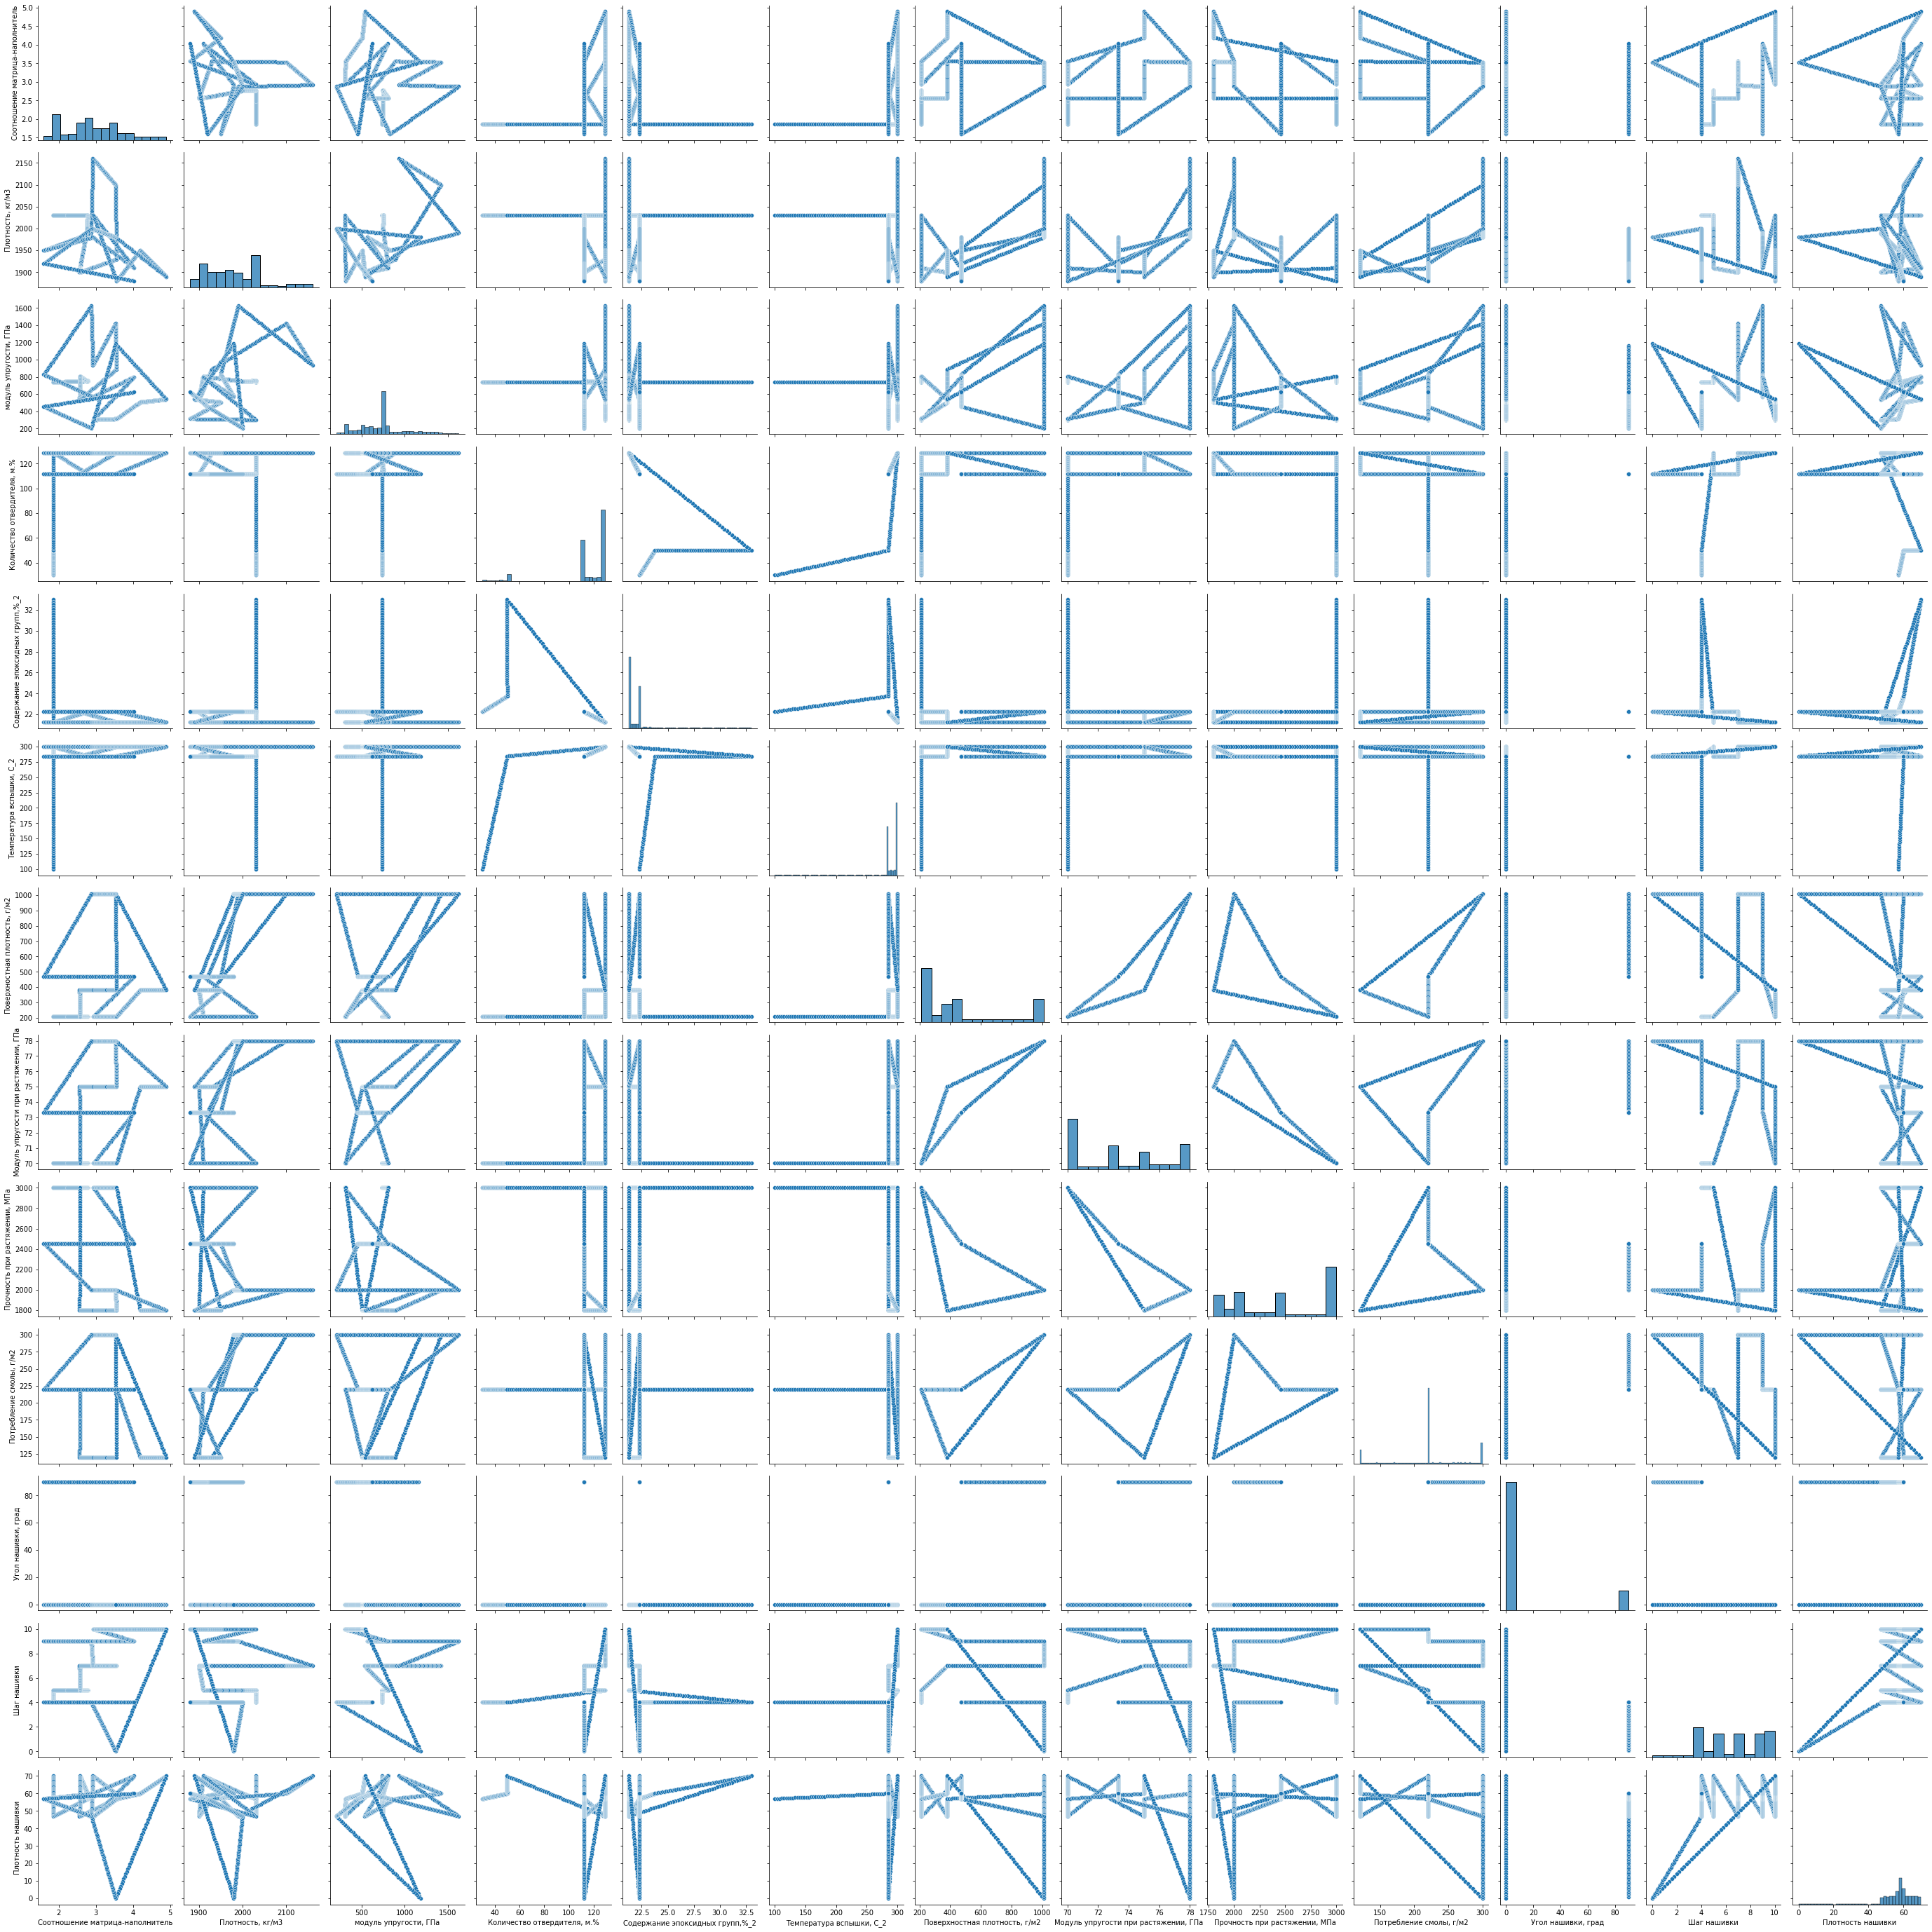

In [18]:
# Попарные графики рассеяния
sns.pairplot(df_s, height=3)

Попарные графики рассеяния не показывают какой-либо зависимости между параметрами

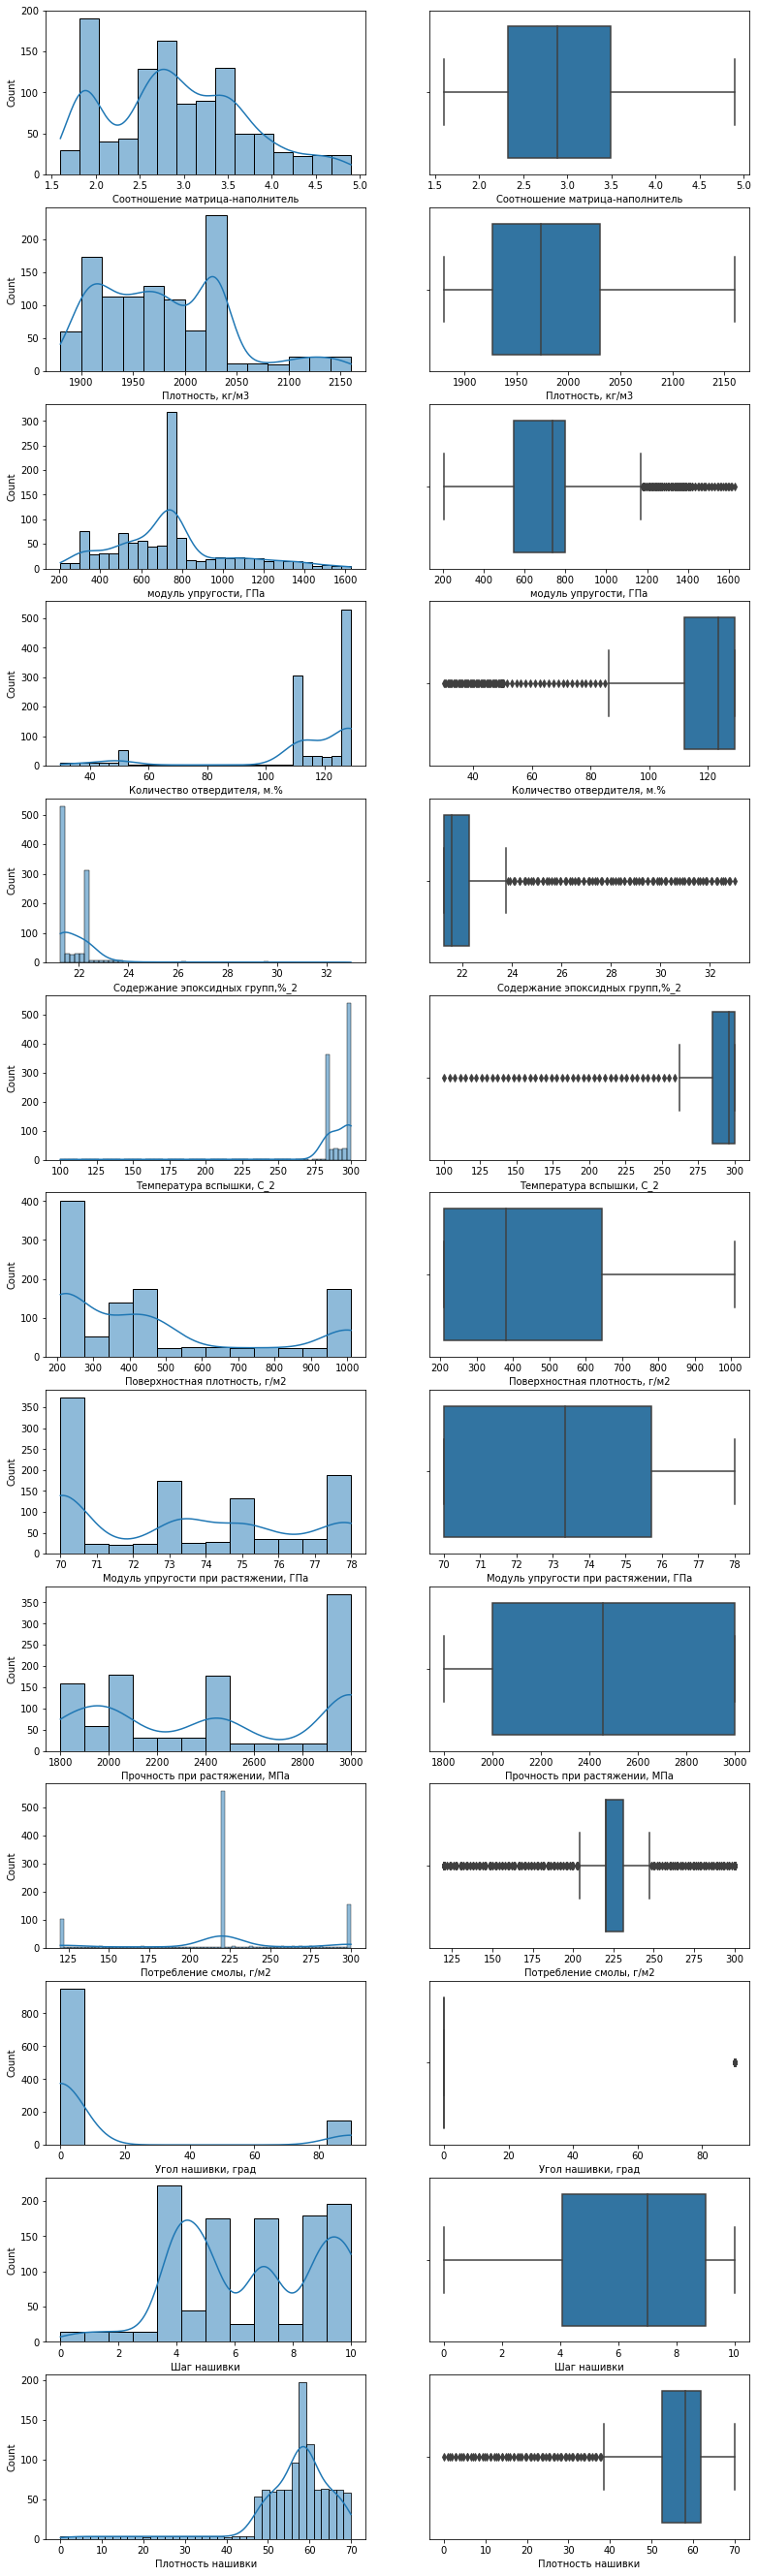

In [19]:
# Графики распределения переменных и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df_s.columns):    
    sns.histplot(data=df_s, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df_s, x=column, ax=axes[k, 1])
plt.show()

Вывод: хотя и имеется некоторое выбросов количество, принято решение не очищать данные от выбросов, поскольку необходимо максимально сохранить данные

###### Очистка данных от выбросов: 

Очистка датасета df от выбросов не производится с целью максимального сохранения исходных данных

In [20]:
# Проверка наличия пропусков типа NULL и NaN в объекте DataFrame, методы isnull() и sum()
df_s.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [21]:
# Проверка наличия дубликатов в объекте DataFrame, методы duplicated() и sum()
df_s.duplicated().sum()

0

In [22]:
# Определение количества строк и столбцов датасета df_s, метод shape
df_s.shape

(1101, 13)

Вывод: датасет качественный

### 2. Нормализация значений параметров с помощью метода MinMaxScaler

In [23]:
# Загрузка MinMaxScaler из библиотеки sklearn
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Применение  MinMaxScaler для нормализации датасета df
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df_s), columns = df_s.columns, index=df_s.index)

In [25]:
# Описательная статистика нормализованного датасета df_norm
df_norm.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1101.000000       1101.000000   
mean                          0.400165          0.356251   
std                           0.237546          0.222428   
min                           0.000000          0.000000   
25%                           0.221010          0.165714   
50%                           0.389709          0.333571   
75%                           0.574626          0.535714   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1101.000000                  1101.000000   
mean                0.376904                     0.845269   
std                 0.202079                     0.248169   
min                 0.000000                     0.000000   
25%                 0.241855                     0.826869   
50%                 0.375079                     0.944598   
75%                 0.418074                     1.000000   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1101.000000               1101.000000   
mean                          0.086626                  0.943618   
std                           0.173724                  0.126198   
min                           0.000000                  0.000000   
25%                           0.000000                  0.923077   
50%                           0.027720                  0.980000   
75%                           0.086626                  1.000000   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1101.000000                           1101.000000   
mean                        0.332232                              0.425939   
std                         0.358999                              0.371191   
min                         0.000000                              0.000000   
25%                         0.000000                              0.000000   
50%                         0.212500                              0.416667   
75%                         0.543250                              0.715000   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1101.000000              1101.000000   
mean                        0.536200                 0.555556   
std                         0.383708                 0.279640   
min                         0.000000                 0.000000   
25%                         0.166667                 0.555556   
50%                         0.546296                 0.555556   
75%                         1.000000                 0.617778   
max                         1.000000                 1.000000   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1101.000000  1101.000000        1101.000000  
mean             0.136240     0.654314           0.797762  
std              0.343199     0.249174           0.164064  
min              0.000000     0.000000           0.000000  
25%              0.000000     0.408000           0.751429  
50%              0.000000     0.700000           0.829714  
75%              0.000000     0.900000           0.885714  
max              1.000000     1.000000           1.000000

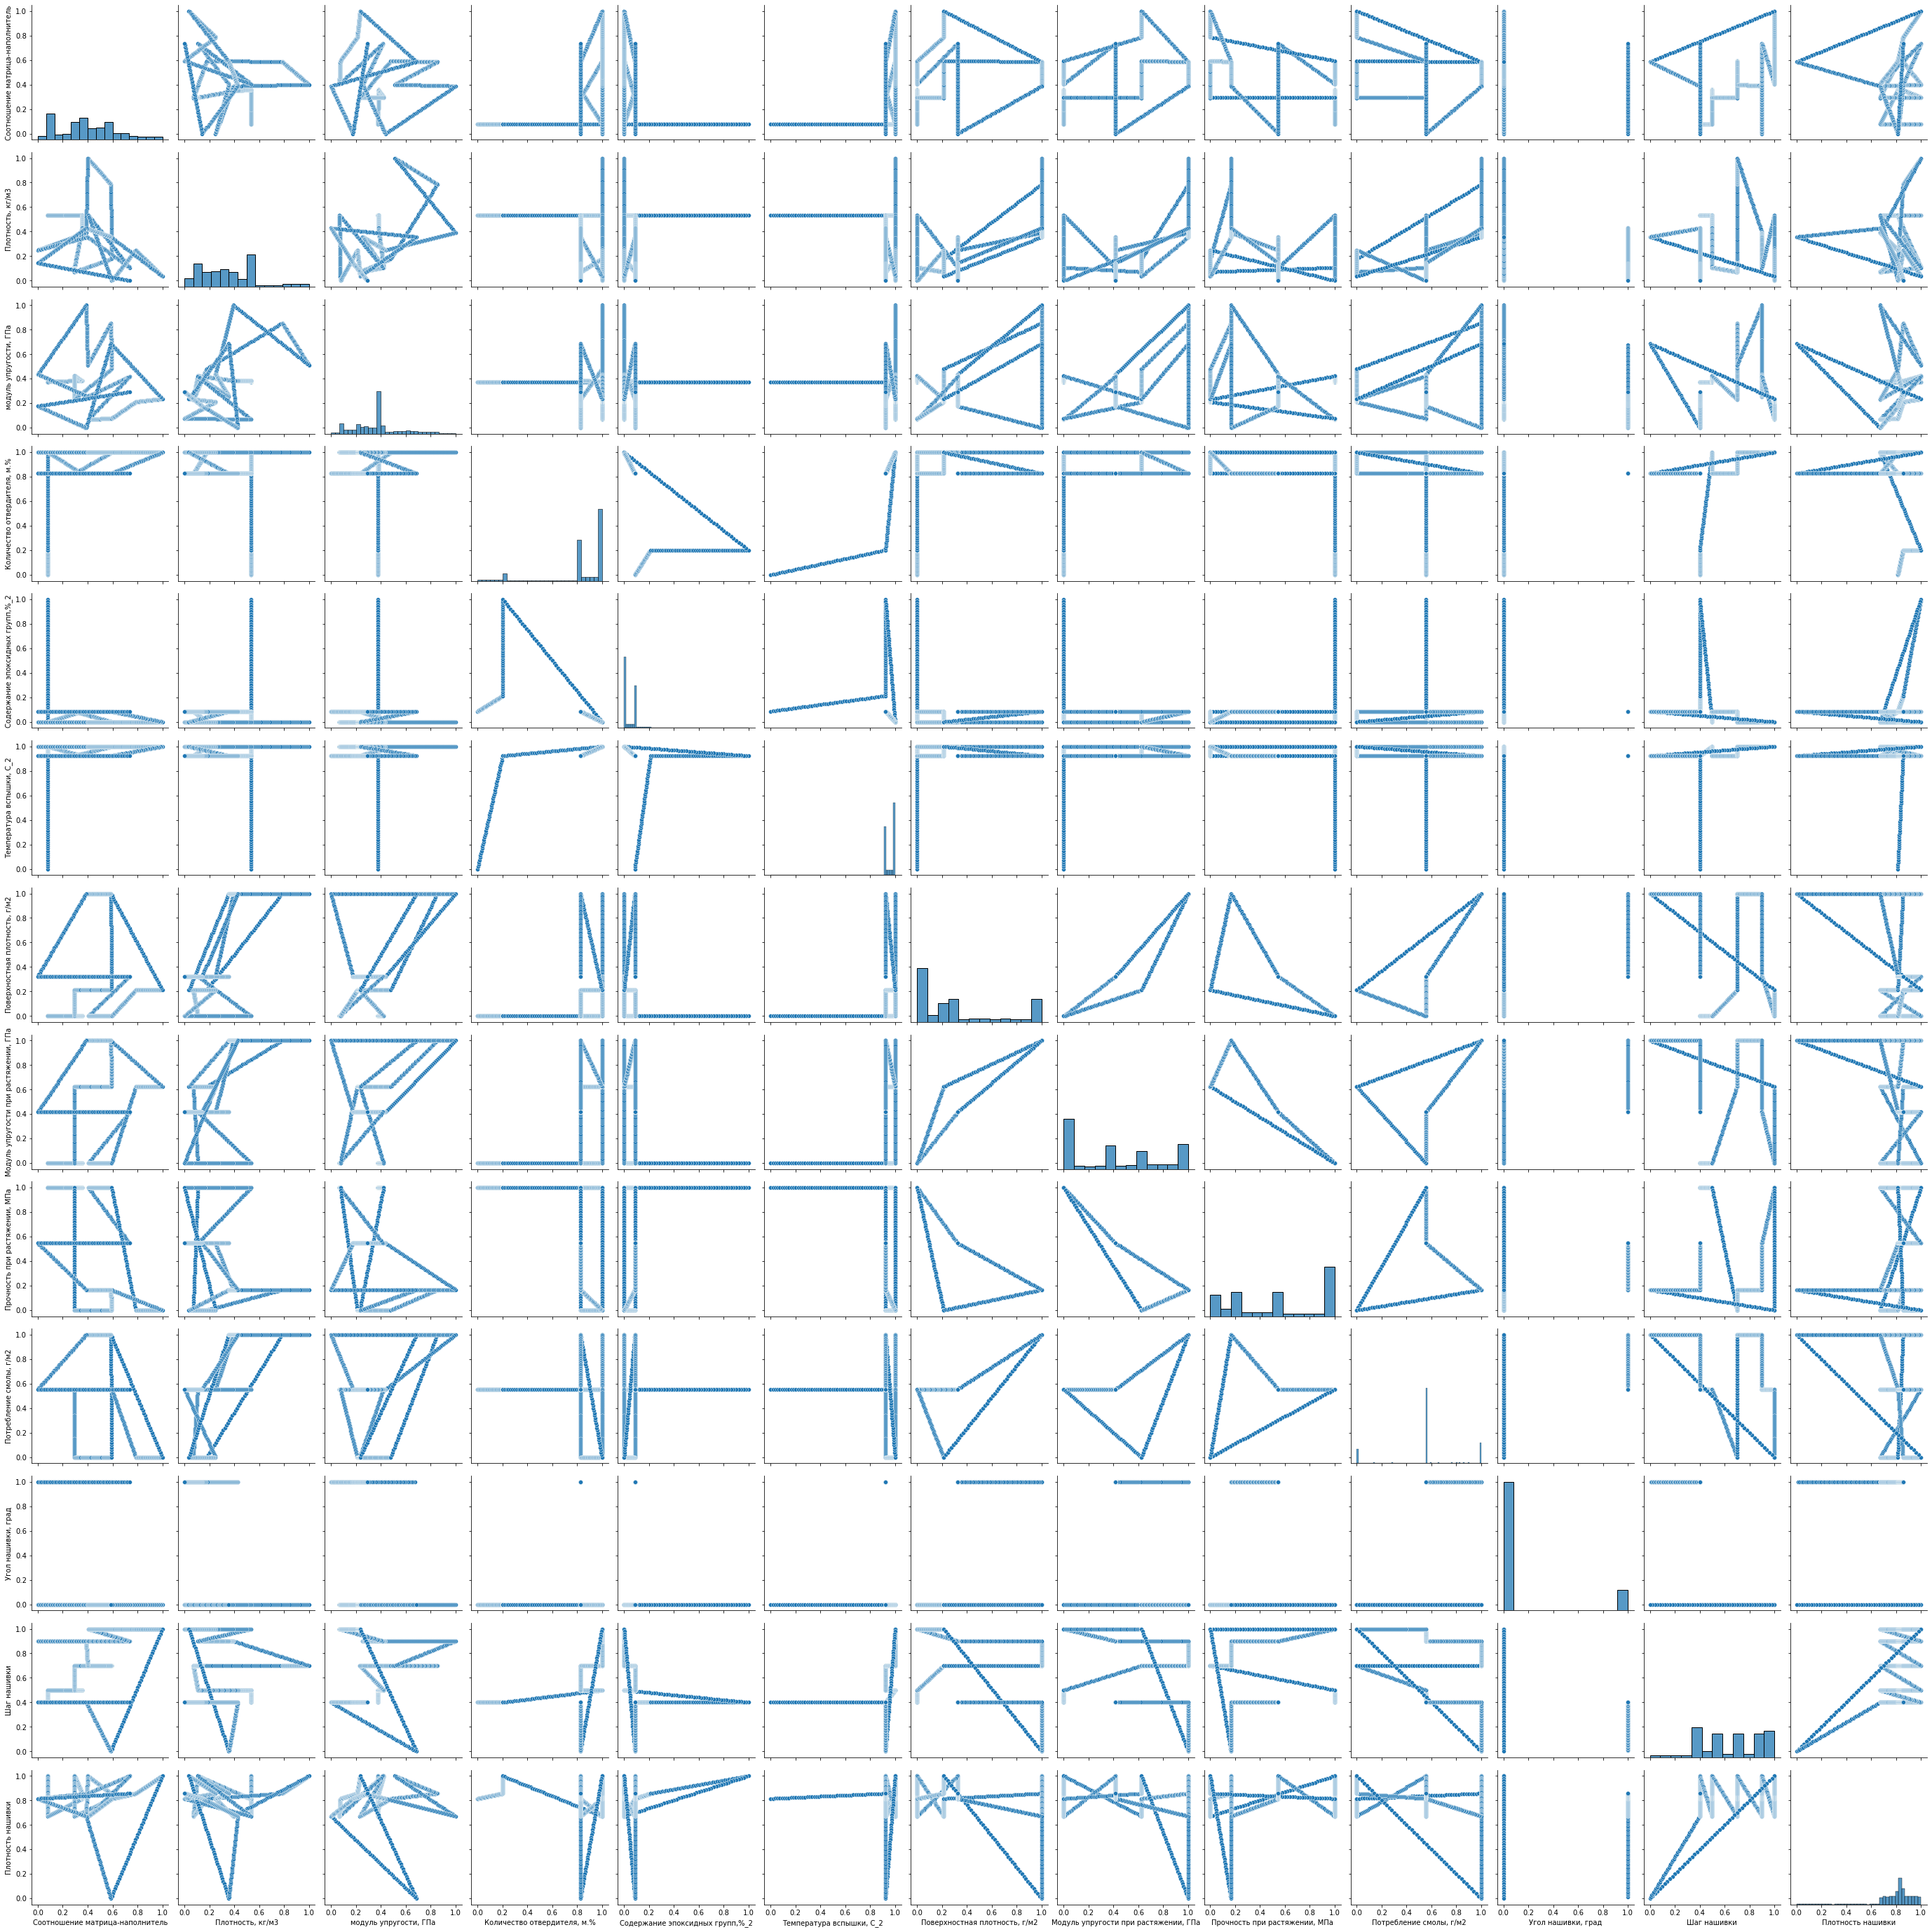

In [26]:
# Попарные графики рассеяния после нормализации
sns.pairplot(df_norm, height=3)

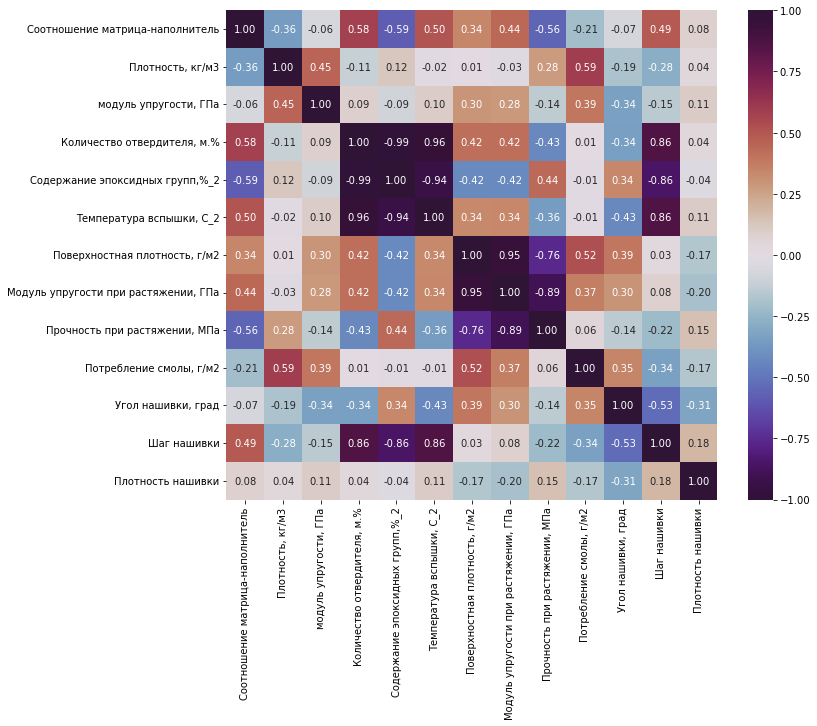

In [27]:
# Матрица корреляции по Спирмену после нормализации
corr = df_norm.corr(method = 'spearman') # Пирсон по умолчанию
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

In [28]:
# Параметр 'Угол нашивки' - категориальный, поэтому его исключаем при построении матрицы корреляции по критерию Пирсона
df_dnorm_=df_norm[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки']]
df_dnorm_

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            0.078481          0.535714   
1                            0.078481          0.535714   
2                            0.078481          0.535714   
3                            0.078481          0.535714   
4                            0.078481          0.535714   
...                               ...               ...   
1096                         0.677764          0.011429   
1097                         0.692498          0.008571   
1098                         0.707232          0.005714   
1099                         0.721966          0.002857   
1100                         0.736700          0.000000   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                  0.375079                     0.000000   
1                  0.375079                     0.004040   
2                  0.375079                     0.008081   
3                  0.375079                     0.012121   
4                  0.375079                     0.016162   
...                     ...                          ...   
1096               0.283710                     0.826869   
1097               0.286044                     0.826869   
1098               0.288377                     0.826869   
1099               0.290710                     0.826869   
1100               0.293043                     0.826869   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                            0.086626                  0.000000   
1                            0.089149                  0.018462   
2                            0.091672                  0.036923   
3                            0.094195                  0.055385   
4                            0.096717                  0.073846   
...                               ...                       ...   
1096                         0.086626                  0.923077   
1097                         0.086626                  0.923077   
1098                         0.086626                  0.923077   
1099                         0.086626                  0.923077   
1100                         0.086626                  0.923077   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                             0.000                              0.000000   
1                             0.000                              0.000000   
2                             0.000                              0.000000   
3                             0.000                              0.000000   
4                             0.000                              0.000000   
...                             ...                                   ...   
1096                          0.325                              0.416667   
1097                          0.325                              0.416667   
1098                          0.325                              0.416667   
1099                          0.325                              0.416667   
1100                          0.325                              0.416667   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  Шаг нашивки  \
0                          1.000000                 0.555556          0.4   
1                          1.000000                 0.555556          0.4   
2                          1.000000                 0.555556          0.4   
3                          1.000000                 0.555556          0.4   
4                          1.000000                 0.555556          0.4   
...                             ...                      ...          ...   
1096                       0.546296                 0.555556          0.4   
1097                       0.546296                 0.555556          0.4   
1098                       0.546296                 0.555556          0.4   
1099                       0.546296                 0.555556          0.4   

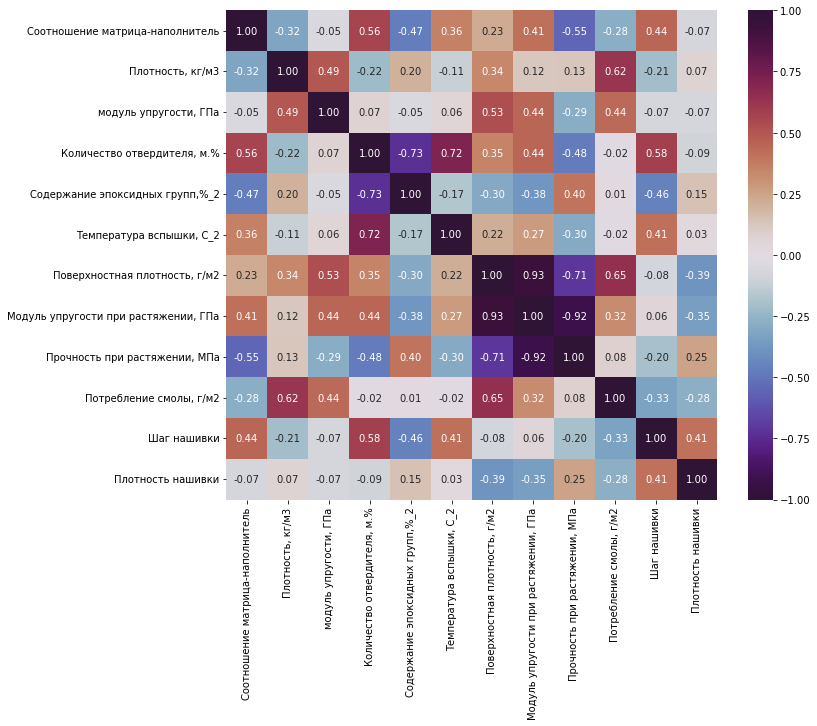

In [29]:
# Матрица корреляции по Пирсону после нормализации
corr = df_dnorm_.corr() # Пирсон по умолчанию
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

Вывод: судя по матрицам корреляции, построенной на основании корреляции по Пирсону для количественных данных и Спирмена для количественных и категориальных данных, коэффициенты корреляции после нормализации параметров мало изменились

### 3. Модели для прогноза модуля упругости при растяжении и прочности при растяжении

In [30]:
# Загрузка модулей библиотеки sklearn для регрессоров и других библиотек
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

###### Разбиение данных на обучающую и тестовую выборки

In [31]:
# Создание датасета для моделей прогноза
df = df_norm.copy()
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.078481          0.535714               0.375079   
1                         0.078481          0.535714               0.375079   
2                         0.078481          0.535714               0.375079   
3                         0.078481          0.535714               0.375079   
4                         0.078481          0.535714               0.375079   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.000000                         0.086626   
1                     0.004040                         0.089149   
2                     0.008081                         0.091672   
3                     0.012121                         0.094195   
4                     0.016162                         0.096717   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.000000                            0.0   
1                  0.018462                            0.0   
2                  0.036923                            0.0   
3                  0.055385                            0.0   
4                  0.073846                            0.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                   0.0                            1.0   
1                                   0.0                            1.0   
2                                   0.0                            1.0   
3                                   0.0                            1.0   
4                                   0.0                            1.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.555556                 0.0          0.4           0.814286  
1                 0.555556                 0.0          0.4           0.815143  
2                 0.555556                 0.0          0.4           0.816000  
3                 0.555556                 0.0          0.4           0.816857  
4                 0.555556                 0.0          0.4           0.817714

In [32]:
# Назначение переменных для создания моделей
x_upr = df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = df[['Модуль упругости при растяжении, ГПа']]
y_pr = df[['Прочность при растяжении, МПа']]
# Разбиение данных на обучающую и тестовую выборки
X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=5)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=5)

###### Метод К ближайших соседей

In [33]:
# Регрессор KNeighborsRegressor() для расчета методом K-ближайших соседей,
# используются унифицированные веса и настройки алгоритма по умолчанию
knr = KNeighborsRegressor()
knr_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
# используется поиск по сетке GridSearchCV для upr
GSCV_knr_upr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_upr.fit(X_train_upr, y_train_upr)
GSCV_knr_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

In [34]:
# Поиск по лучшей модели и вывод результатов для upr
knr_upr = GSCV_knr_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {knr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score KNR для модуля упругости при растяжении: 1.0


In [35]:
# Создание объекта pandas DataFrame()
models = pd.DataFrame()

In [36]:
# Запись результатов расчета в DataFrame()
knr_upr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, knr_upr.predict(X_test_upr)), 
   'R2 score': knr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [37]:
# Соединение объектов DataFrame()
models = pd.concat([models, knr_upr_result])

In [38]:
# Вывод результатов в кросс-таблицу
models

Model       MAE  R2 score
Модуль упругости при растяжении  KNeighborsRegressor_upr  0.002207       1.0

Вывод: коэффициент детерминации равен 1, что очень хорошо

In [39]:
# Используется поиск по сетке GridSearchCV для pr
GSCV_knr_pr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_pr.fit(X_train_pr, y_train_pr)
GSCV_knr_pr.best_params_

{'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}

In [40]:
# Поиск по лучшей модели и вывод результатов для pr
knr_pr = GSCV_knr_pr.best_estimator_
print(f'R2-score KNR для прочности при растяжении: {knr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score KNR для прочности при растяжении: 1.0


In [41]:
# Запись результатов расчета в DataFrame()
knr_pr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, knr_pr.predict(X_test_pr)), 
   'R2 score': knr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [42]:
# Соединение объектов DataFrame()
models = pd.concat([models, knr_pr_result])

In [43]:
# Вывод результатов в кросс-таблицу
models

Model       MAE  R2 score
Модуль упругости при растяжении  KNeighborsRegressor_upr  0.002207       1.0
Прочность при растяжении          KNeighborsRegressor_pr  0.002069       1.0

Вывод: коэффициент детерминации равен 1, что очень хорошо

###### Стохастический градиентный спуск

In [44]:
# Регрессор SGDRegressor() для расчета методом стохастического градиентного спуска,
# используются настройки алгоритма по умолчанию
sgd = SGDRegressor()
sgd_params = {'loss' : ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
          'penalty' : ['elasticnet', 'l2', 'l1'],
          'alpha' : [0.0001, 0.001, 0.01, 0.0002, 0.002],
          'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
          'epsilon' : [0.1, 0.01, 0.2, 0.02]
          }
# используется поиск по сетке GridSearchCV для upr
GSCV_sgd_upr = GridSearchCV(sgd, sgd_params, cv=10, verbose=0)
GSCV_sgd_upr.fit(X_train_upr, np.ravel(y_train_upr))
GSCV_sgd_upr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'alpha': 0.0001,
 'epsilon': 0.2,
 'learning_rate': 'optimal',
 'loss': 'huber',
 'penalty': 'elasticnet'}

In [45]:
# Поиск по лучшей модели и вывод результатов для upr
sgd_upr = GSCV_sgd_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {sgd_upr.score(X_test_upr, y_test_upr).round(3)}')
print(mean_absolute_error(y_test_upr, sgd_upr.predict(X_test_upr)))

R2-score KNR для модуля упругости при растяжении: 1.0
0.00014676006317285438


In [46]:
# Запись результатов расчета в DataFrame()
sgd_upr_result = pd.DataFrame({
   'Model': 'SGDRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, sgd_upr.predict(X_test_upr)), 
   'R2 score': sgd_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [47]:
# Соединение объектов DataFrame()
models = pd.concat([models, sgd_upr_result])

In [48]:
# Вывод результатов в кросс-таблицу
models

Model       MAE  R2 score
Модуль упругости при растяжении  KNeighborsRegressor_upr  0.002207       1.0
Прочность при растяжении          KNeighborsRegressor_pr  0.002069       1.0
Модуль упругости при растяжении         SGDRegressor_upr  0.000147       1.0

Вывод: коэффициент детерминации равен 1, что очень хорошо

In [49]:
# Используется поиск по сетке GridSearchCV для pr
GSCV_sgd_pr = GridSearchCV(sgd, sgd_params, cv=10)
GSCV_sgd_pr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_sgd_pr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

{'alpha': 0.0001,
 'epsilon': 0.2,
 'learning_rate': 'optimal',
 'loss': 'huber',
 'penalty': 'elasticnet'}

In [50]:
# Поиск по лучшей модели и вывод результатов для pr
sgd_pr = GSCV_sgd_pr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {sgd_pr.score(X_test_pr, y_test_pr).round(3)}')
print(mean_absolute_error(y_test_pr, sgd_pr.predict(X_test_pr)))

R2-score KNR для модуля упругости при растяжении: 1.0
0.001409994237139462


In [51]:
# Запись результатов расчета в DataFrame()
sgd_pr_result = pd.DataFrame({
   'Model': 'SGDRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, sgd_pr.predict(X_test_pr)), 
   'R2 score': sgd_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [52]:
# Соединение объектов DataFrame()
models = pd.concat([models, sgd_pr_result])

In [53]:
# Вывод результатов в кросс-таблицу
models

Model       MAE  R2 score
Модуль упругости при растяжении  KNeighborsRegressor_upr  0.002207       1.0
Прочность при растяжении          KNeighborsRegressor_pr  0.002069       1.0
Модуль упругости при растяжении         SGDRegressor_upr  0.000147       1.0
Прочность при растяжении                 SGDRegressor_pr  0.001410       1.0

Вывод: коэффициент детерминации равен 1, что очень хорошо

###### Линейная регрессия

In [54]:
# Регрессор LinearRegression() для расчета методом линейной регрессии,
# используются настройки алгоритма по умолчанию
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}
# используется поиск по сетке GridSearchCV для upr
GSCV_lr_upr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [55]:
# Поиск по лучшей модели и вывод результатов для upr
lr_upr = GSCV_lr_upr.best_estimator_
print(f'R2-score LR для модуля упругости при растяжении: {lr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score LR для модуля упругости при растяжении: 1.0


In [56]:
# Запись результатов расчета в DataFrame()
lr_upr_result = pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)), 
   'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [57]:
# Соединение объектов DataFrame()
models = pd.concat([models, lr_upr_result])

In [58]:
# Вывод результатов в кросс-таблицу
models

Model           MAE  \
Модуль упругости при растяжении  KNeighborsRegressor_upr  2.207152e-03   
Прочность при растяжении          KNeighborsRegressor_pr  2.068717e-03   
Модуль упругости при растяжении         SGDRegressor_upr  1.467601e-04   
Прочность при растяжении                 SGDRegressor_pr  1.409994e-03   
Модуль упругости при растяжении     LinearRegression_upr  5.495352e-16   

                                 R2 score  
Модуль упругости при растяжении       1.0  
Прочность при растяжении              1.0  
Модуль упругости при растяжении       1.0  
Прочность при растяжении              1.0  
Модуль упругости при растяжении       1.0

Вывод: коэффициент детерминации равен 1, что очень хорошо

In [59]:
# используется поиск по сетке GridSearchCV для pr
GSCV_lr_pr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_pr.fit(X_train_pr, y_train_pr)
GSCV_lr_pr.best_params_

{'fit_intercept': 'True'}

In [60]:
# Поиск по лучшей модели и вывод результатов для pr
lr_pr = GSCV_lr_pr.best_estimator_
print(f'R2-score LR для прочности при растяжении: {lr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score LR для прочности при растяжении: 1.0


In [61]:
# Запись результатов расчета в DataFrame()
lr_pr_result = pd.DataFrame({
   'Model': 'LinearRegression_pr', 
   'MAE': mean_absolute_error(y_test_pr, lr_pr.predict(X_test_pr)), 
   'R2 score': lr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [62]:
# Соединение объектов DataFrame()
models = pd.concat([models, lr_pr_result])

In [63]:
# Вывод результатов в кросс-таблицу
models

Model           MAE  \
Модуль упругости при растяжении  KNeighborsRegressor_upr  2.207152e-03   
Прочность при растяжении          KNeighborsRegressor_pr  2.068717e-03   
Модуль упругости при растяжении         SGDRegressor_upr  1.467601e-04   
Прочность при растяжении                 SGDRegressor_pr  1.409994e-03   
Модуль упругости при растяжении     LinearRegression_upr  5.495352e-16   
Прочность при растяжении             LinearRegression_pr  2.977435e-16   

                                 R2 score  
Модуль упругости при растяжении       1.0  
Прочность при растяжении              1.0  
Модуль упругости при растяжении       1.0  
Прочность при растяжении              1.0  
Модуль упругости при растяжении       1.0  
Прочность при растяжении              1.0

Вывод: коэффициент детерминации равен 1, что очень хорошо

###### Случайный лес

In [64]:
# Регрессор RandomForestRegressor() для расчета методом случайного леса
# испальзуются настройки алгоритма по умолчанию
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
# Используется поиск по RandomizedSearchCV для upr
RSCV_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_upr.fit(X_train_upr, np.ravel(y_train_upr))
RSCV_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 250,
 'min_samples_split': 20,
 'min_samples_leaf': 4,
 'max_depth': 6,
 'criterion': 'squared_error',
 'bootstrap': 'True'}

In [65]:
# Поиск по лучшей модели и вывод результатов для upr
rfr_upr = RSCV_rfr_upr.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {rfr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score RFR для модуля упругости при растяжении: 0.998


In [66]:
# Запись результатов расчета в DataFrame()
rfr_upr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, rfr_upr.predict(X_test_upr)), 
   'R2 score': rfr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [67]:
# Соединение объектов DataFrame()
models = pd.concat([models, rfr_upr_result])

In [68]:
# Вывод результатов в кросс-таблицу
models

Model           MAE  \
Модуль упругости при растяжении    KNeighborsRegressor_upr  2.207152e-03   
Прочность при растяжении            KNeighborsRegressor_pr  2.068717e-03   
Модуль упругости при растяжении           SGDRegressor_upr  1.467601e-04   
Прочность при растяжении                   SGDRegressor_pr  1.409994e-03   
Модуль упругости при растяжении       LinearRegression_upr  5.495352e-16   
Прочность при растяжении               LinearRegression_pr  2.977435e-16   
Модуль упругости при растяжении  RandomForestRegressor_upr  8.409517e-03   

                                 R2 score  
Модуль упругости при растяжении     1.000  
Прочность при растяжении            1.000  
Модуль упругости при растяжении     1.000  
Прочность при растяжении            1.000  
Модуль упругости при растяжении     1.000  
Прочность при растяжении            1.000  
Модуль упругости при растяжении     0.998

Вывод: коэффициент детерминации близок к  1, что очень хорошо

In [69]:
# Используется поиск по RandomizedSearchCV() для pr
RSCV_rfr_pr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_pr.fit(X_train_pr, np.ravel(y_train_pr))
RSCV_rfr_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 510,
 'min_samples_split': 20,
 'min_samples_leaf': 6,
 'max_depth': 4,
 'criterion': 'squared_error',
 'bootstrap': 'False'}

In [70]:
# Поиск по лучшей модели и вывод результатов для pr
rfr_pr = RSCV_rfr_pr.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {rfr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score RFR для прочности при растяжении: 0.995


In [71]:
# Запись результатов расчета в DataFrame()
rfr_pr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, rfr_pr.predict(X_test_pr)), 
   'R2 score': rfr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [72]:
# Соединение объектов DataFrame()
models = pd.concat([models, rfr_pr_result])

In [73]:
# Вывод результатов в кросс-таблицу
models 

Model           MAE  \
Модуль упругости при растяжении    KNeighborsRegressor_upr  2.207152e-03   
Прочность при растяжении            KNeighborsRegressor_pr  2.068717e-03   
Модуль упругости при растяжении           SGDRegressor_upr  1.467601e-04   
Прочность при растяжении                   SGDRegressor_pr  1.409994e-03   
Модуль упругости при растяжении       LinearRegression_upr  5.495352e-16   
Прочность при растяжении               LinearRegression_pr  2.977435e-16   
Модуль упругости при растяжении  RandomForestRegressor_upr  8.409517e-03   
Прочность при растяжении          RandomForestRegressor_pr  1.338104e-02   

                                 R2 score  
Модуль упругости при растяжении     1.000  
Прочность при растяжении            1.000  
Модуль упругости при растяжении     1.000  
Прочность при растяжении            1.000  
Модуль упругости при растяжении     1.000  
Прочность при растяжении            1.000  
Модуль упругости при растяжении     0.998  
Прочность при растяжении            0.995

Вывод: коэффициент детерминации близок к 1, что очень хорошо

###### Многослойный перцептрон

In [75]:
# Регрессор MLPRegressor() для расчета с помощью создания многослойного перцептрона
# используются настройки алгоритма
mlpr = MLPRegressor(random_state=5)
mlpr_params = {
    'hidden_layer_sizes' : [(64, 32, 12), (12, 12, 12, 12, 12),
                            (32, 32, 16, 8), (16, 16, 8)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'max_iter' : [300],
    'learning_rate' : ['constant', 'adaptive', 'invscaling']
}

In [76]:
# используется поиск по сетке GridSearchCV для upr
GSCV_mlpr_upr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_upr.fit(X_train_upr, np.ravel(y_train_upr))
GSCV_mlpr_upr.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (64, 32, 12),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'adam'}

In [77]:
# Поиск по лучшей модели и вывод результатов для upr
mlpr_upr = GSCV_mlpr_upr.best_estimator_
print(f'R2-score MLPR для модуля упругости при растяжении: {mlpr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score MLPR для модуля упругости при растяжении: 0.997


In [78]:
# Запись результатов расчета в DataFrame()
mlpr_upr_result = pd.DataFrame({
   'Model': 'MLPRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, mlpr_upr.predict(X_test_upr)), 
   'R2 score': mlpr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [79]:
# Соединение объектов DataFrame()
models = pd.concat([models, mlpr_upr_result])
# Вывод результатов в кросс-таблицу
models

Model           MAE  \
Модуль упругости при растяжении    KNeighborsRegressor_upr  2.207152e-03   
Прочность при растяжении            KNeighborsRegressor_pr  2.068717e-03   
Модуль упругости при растяжении           SGDRegressor_upr  1.467601e-04   
Прочность при растяжении                   SGDRegressor_pr  1.409994e-03   
Модуль упругости при растяжении       LinearRegression_upr  5.495352e-16   
Прочность при растяжении               LinearRegression_pr  2.977435e-16   
Модуль упругости при растяжении  RandomForestRegressor_upr  8.409517e-03   
Прочность при растяжении          RandomForestRegressor_pr  1.338104e-02   
Модуль упругости при растяжении           MLPRegressor_upr  1.473170e-02   

                                 R2 score  
Модуль упругости при растяжении     1.000  
Прочность при растяжении            1.000  
Модуль упругости при растяжении     1.000  
Прочность при растяжении            1.000  
Модуль упругости при растяжении     1.000  
Прочность при растяжении            1.000  
Модуль упругости при растяжении     0.998  
Прочность при растяжении            0.995  
Модуль упругости при растяжении     0.997

Вывод: коэффициент детерминации близок к 1, что очень хорошо

In [80]:
# используется поиск по сетке GridSearchCV для pr
GSCV_mlpr_pr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_pr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_mlpr_pr.best_params_

{'activation': 'identity',
 'hidden_layer_sizes': (64, 32, 12),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'adam'}

In [81]:
# Поиск по лучшей модели и вывод результатов для pr
mlpr_pr = GSCV_mlpr_pr.best_estimator_
print(f'R2-score MLPR для прочности при растяжении: {mlpr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score MLPR для прочности при растяжении: 0.999


In [82]:
# Запись результатов расчета в DataFrame()
mlpr_pr_result = pd.DataFrame({
   'Model': 'MLPRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, mlpr_pr.predict(X_test_pr)), 
   'R2 score': mlpr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [83]:
# Соединение объектов DataFrame()
models = pd.concat([models, mlpr_pr_result])
# Вывод результатов в кросс-таблицу
models

Model           MAE  \
Модуль упругости при растяжении    KNeighborsRegressor_upr  2.207152e-03   
Прочность при растяжении            KNeighborsRegressor_pr  2.068717e-03   
Модуль упругости при растяжении           SGDRegressor_upr  1.467601e-04   
Прочность при растяжении                   SGDRegressor_pr  1.409994e-03   
Модуль упругости при растяжении       LinearRegression_upr  5.495352e-16   
Прочность при растяжении               LinearRegression_pr  2.977435e-16   
Модуль упругости при растяжении  RandomForestRegressor_upr  8.409517e-03   
Прочность при растяжении          RandomForestRegressor_pr  1.338104e-02   
Модуль упругости при растяжении           MLPRegressor_upr  1.473170e-02   
Прочность при растяжении                   MLPRegressor_pr  9.005498e-03   

                                 R2 score  
Модуль упругости при растяжении     1.000  
Прочность при растяжении            1.000  
Модуль упругости при растяжении     1.000  
Прочность при растяжении            1.000  
Модуль упругости при растяжении     1.000  
Прочность при растяжении            1.000  
Модуль упругости при растяжении     0.998  
Прочность при растяжении            0.995  
Модуль упругости при растяжении     0.997  
Прочность при растяжении            0.999

In [84]:
# Сортировка кросс- таблицы и вывод результатов
models_sort = models.sort_values(by=['MAE', 'R2 score'])
models_sort

Model           MAE  \
Прочность при растяжении               LinearRegression_pr  2.977435e-16   
Модуль упругости при растяжении       LinearRegression_upr  5.495352e-16   
Модуль упругости при растяжении           SGDRegressor_upr  1.467601e-04   
Прочность при растяжении                   SGDRegressor_pr  1.409994e-03   
Прочность при растяжении            KNeighborsRegressor_pr  2.068717e-03   
Модуль упругости при растяжении    KNeighborsRegressor_upr  2.207152e-03   
Модуль упругости при растяжении  RandomForestRegressor_upr  8.409517e-03   
Прочность при растяжении                   MLPRegressor_pr  9.005498e-03   
Прочность при растяжении          RandomForestRegressor_pr  1.338104e-02   
Модуль упругости при растяжении           MLPRegressor_upr  1.473170e-02   

                                 R2 score  
Прочность при растяжении            1.000  
Модуль упругости при растяжении     1.000  
Модуль упругости при растяжении     1.000  
Прочность при растяжении            1.000  
Прочность при растяжении            1.000  
Модуль упругости при растяжении     1.000  
Модуль упругости при растяжении     0.998  
Прочность при растяжении            0.999  
Прочность при растяжении            0.995  
Модуль упругости при растяжении     0.997

Вывод: коэффициент детерминации близок к 1, что очень хорошо

###### Графики ошибок моделей

Text(0.5, 1.0, 'Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа')

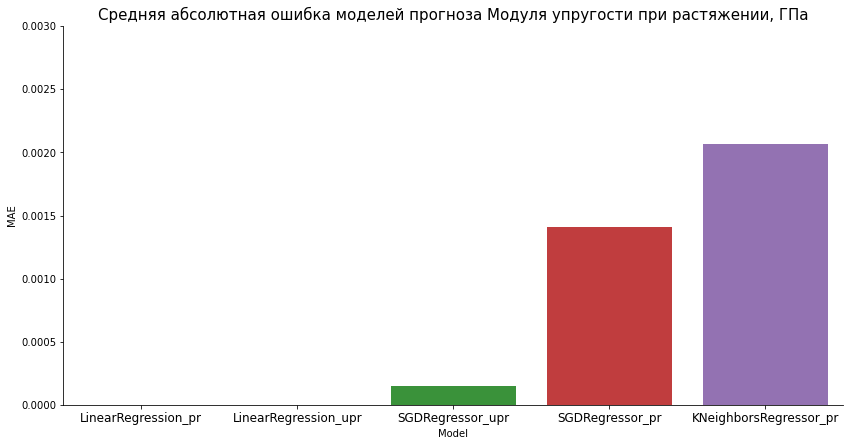

In [85]:
# Создание графика для средней абсолютной ошибки моделей прогноза параметра 'Модуля упругости при растяжении, ГПа'
sns.catplot(data=models_sort[0:5], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=0, ymax=0.003)
plt.xticks(size=12)
plt.title('Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа', size=15)

Text(0.5, 1.0, 'Средняя абсолютная ошибка моделей прогноза Прочности при растяжении, МПа')

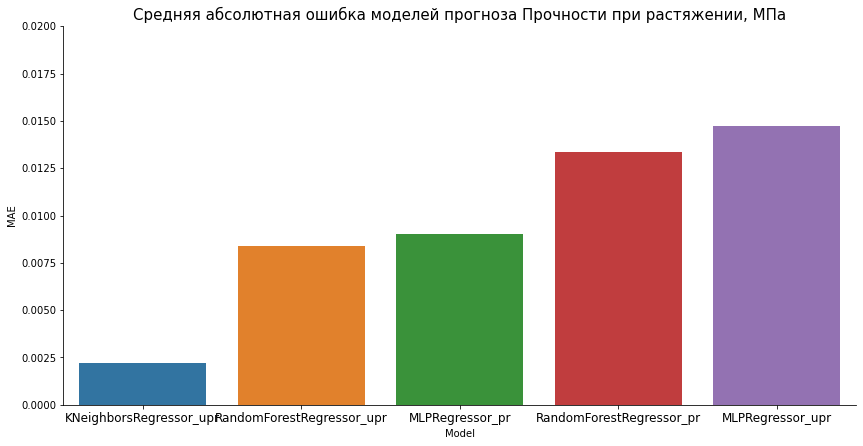

In [86]:
# Создание графика для средней абсолютной ошибки моделей прогноза параметра 'Прочности при растяжении, МПа'
sns.catplot(data=models_sort[5:10], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=0, ymax=0.02)
plt.xticks(size=12)
plt.title('Средняя абсолютная ошибка моделей прогноза Прочности при растяжении, МПа', size=15)

Вывод: средние ошибки моделей прогноза не больше0,002

###### Построение нейронной сети на Keras

Построение нейронной сети на Keras для предсказания следующих параметров: Модуль упругости при растяжении, Прочность при растяжении, Соотношение матрица-наполнитель.

In [87]:
# Загрузка библиотеки tensorflow
import tensorflow as tf
# Загрузка модуля keras библиотеки tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Вывод версии библиотеки tensorflow
print(tf.__version__)

2.11.0


- Нейронная сеть для прогноза параметра Модуль упругости при растяжении

In [88]:
# Создание слоя, который выполняет нормализацию входных объектов
normalizer = tf.keras.layers.Normalization(axis=-1)

In [89]:
# Получение данных в слой
X_train_upr_norm = normalizer.adapt(np.array(X_train_upr))

In [90]:
# Вид модели - коллекция, стек слоев
model_upr = Sequential(X_train_upr_norm)
# Добавление слоев в модель
model_upr.add(Dense(128))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(1))
model_upr.add(Activation(activation='elu'))

In [91]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_upr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_absolute_error')

In [92]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_upr = model_upr.fit(
    X_train_upr,
    y_train_upr,
    batch_size = 64,
    epochs=40,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/40
10/10 [==============================] - 2s 32ms/step - loss: 0.3344 - val_loss: 0.3315
Epoch 2/40
10/10 [==============================] - 0s 5ms/step - loss: 0.1741 - val_loss: 0.3109
Epoch 3/40
10/10 [==============================] - 0s 5ms/step - loss: 0.1130 - val_loss: 0.2890
Epoch 4/40
10/10 [==============================] - 0s 5ms/step - loss: 0.0920 - val_loss: 0.2783
Epoch 5/40
10/10 [==============================] - 0s 5ms/step - loss: 0.0948 - val_loss: 0.2416
Epoch 6/40
10/10 [==============================] - 0s 5ms/step - loss: 0.1028 - val_loss: 0.2745
Epoch 7/40
10/10 [==============================] - 0s 6ms/step - loss: 0.0805 - val_loss: 0.2669
Epoch 8/40
10/10 [==============================] - 0s 5ms/step - loss: 0.0885 - val_loss: 0.2295
Epoch 9/40
10/10 [==============================] - 0s 6ms/step - loss: 0.0994 - val_loss: 0.2594
Epoch 10/40
10/10 [==============================] - 0s 5ms/step - loss: 0.1113 - val_loss: 0.2368
Epoch 11/40
10/10 

In [93]:
# Вывод архитектуры сети для upr
model_upr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0

In [94]:
#Функция для построения графика потерь модели на тренировочной и тестовой выборках
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

#Функция для построения точечного графика оригинального и предсказанного значения у   
def actual_and_predicted_scatter(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size=15)
    plt.scatter(original_y, predicted_y)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()

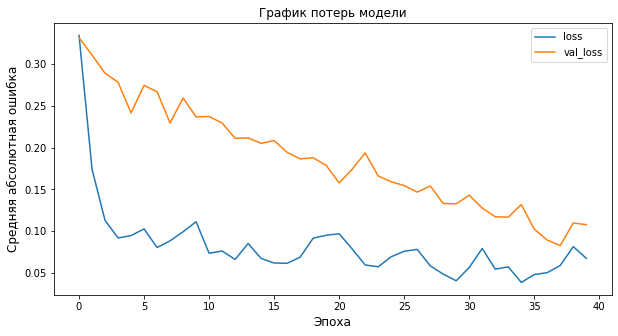

In [95]:
# Построение графика потерь модели
model_loss_plot(history_upr)

11/11 [==============================] - 0s 1ms/step


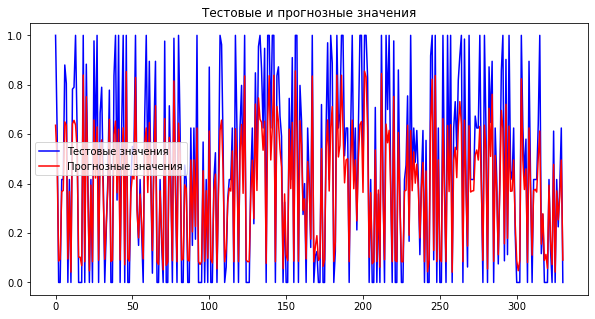

In [96]:
# Построение графика оригинального и прогнозного значения y
pred_upr = model_upr.predict(np.array((X_test_upr)))
original_upr = y_test_upr.values
predicted_upr = pred_upr

actual_and_predicted_plot(original_upr, predicted_upr)

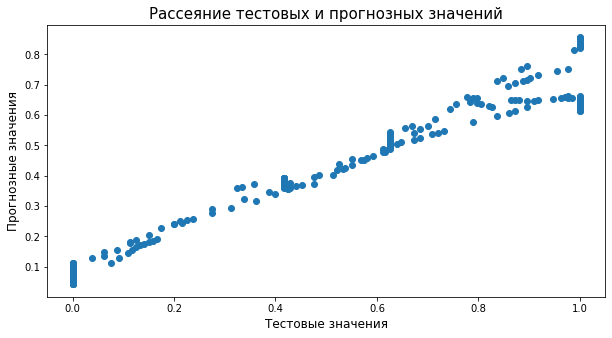

In [97]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_upr, predicted_upr)

In [98]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_upr.evaluate(X_test_upr, y_test_upr, verbose=1)}')

11/11 [==============================] - 0s 1ms/step - loss: 0.1263
Model MAE: 0.12629076838493347


In [99]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_upr-np.mean(y_test_upr)))}')

MAE среднего значения: Модуль упругости при растяжении, ГПа    0.322344
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


- Нейронная сеть для прогноза параметра Прочность при растяжении

In [100]:
# Получение данных в слой, который выполняет нормализацию входных объектов
X_train_pr_norm = normalizer.adapt(np.array(X_train_pr))

In [101]:
# Вид модели - коллекция, стек слоев
model_pr = Sequential(X_train_pr_norm)
# Добавление слоев в модель
model_pr.add(Dense(128))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(32))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(1))
model_pr.add(Activation('selu'))

In [102]:
# Остановка обучения, когда контролируемая метрика перестает улучшаться
early_pr = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [103]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_pr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_absolute_error'
    )

In [104]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_pr = model_pr.fit(
    X_train_pr,
    y_train_pr,
    batch_size = 32,
    epochs=300,
    verbose=1,
    validation_split = 0.2,
    callbacks=[early_pr])

Epoch 1/300
20/20 [==============================] - 2s 13ms/step - loss: 0.6355 - val_loss: 0.4928
Epoch 2/300
20/20 [==============================] - 0s 3ms/step - loss: 0.3072 - val_loss: 0.4155
Epoch 3/300
20/20 [==============================] - 0s 3ms/step - loss: 0.2100 - val_loss: 0.3970
Epoch 4/300
20/20 [==============================] - 0s 3ms/step - loss: 0.1620 - val_loss: 0.4038
Epoch 5/300
20/20 [==============================] - 0s 3ms/step - loss: 0.1561 - val_loss: 0.3569
Epoch 6/300
20/20 [==============================] - 0s 3ms/step - loss: 0.1459 - val_loss: 0.3584
Epoch 7/300
20/20 [==============================] - 0s 3ms/step - loss: 0.1234 - val_loss: 0.3457
Epoch 8/300
20/20 [==============================] - 0s 3ms/step - loss: 0.1229 - val_loss: 0.2976
Epoch 9/300
20/20 [==============================] - 0s 3ms/step - loss: 0.1235 - val_loss: 0.2918
Epoch 10/300
20/20 [==============================] - 0s 3ms/step - loss: 0.0960 - val_loss: 0.2854
Epoch 11

20/20 [==============================] - 0s 3ms/step - loss: 0.0526 - val_loss: 0.0251
Epoch 84/300
20/20 [==============================] - 0s 3ms/step - loss: 0.0584 - val_loss: 0.0224
Epoch 85/300
20/20 [==============================] - 0s 3ms/step - loss: 0.0508 - val_loss: 0.0481
Epoch 86/300
20/20 [==============================] - 0s 3ms/step - loss: 0.0446 - val_loss: 0.0402
Epoch 87/300
20/20 [==============================] - 0s 3ms/step - loss: 0.0441 - val_loss: 0.0449
Epoch 88/300
20/20 [==============================] - 0s 3ms/step - loss: 0.0438 - val_loss: 0.0264
Epoch 89/300
20/20 [==============================] - 0s 3ms/step - loss: 0.0541 - val_loss: 0.0331
Epoch 90/300
20/20 [==============================] - 0s 3ms/step - loss: 0.0441 - val_loss: 0.0617
Epoch 91/300
20/20 [==============================] - 0s 3ms/step - loss: 0.0454 - val_loss: 0.0361
Epoch 92/300
20/20 [==============================] - 0s 3ms/step - loss: 0.0465 - val_loss: 0.0539
Epoch 93/300


In [105]:
# Вывод архитектуры сети для pr
model_pr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1664      
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 64)               

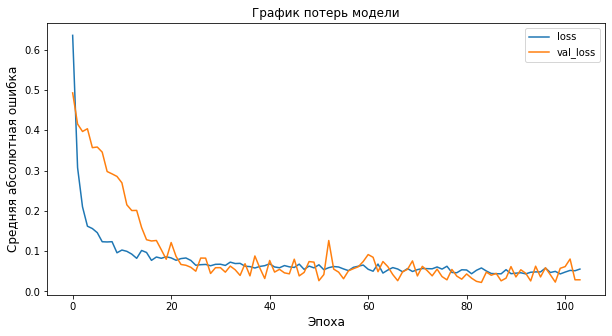

In [106]:
# Построение графика потерь модели
model_loss_plot(history_pr)

11/11 [==============================] - 0s 1ms/step


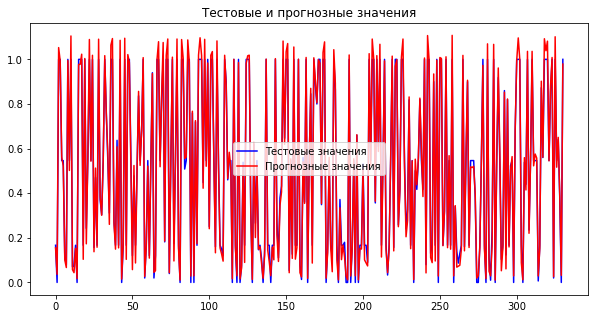

In [107]:
# Построение графика оригинального и прогнозного значения y
pred_pr = model_pr.predict(np.array((X_test_pr)))
original_pr = y_test_pr.values
predicted_pr = pred_pr

actual_and_predicted_plot(original_pr, predicted_pr)

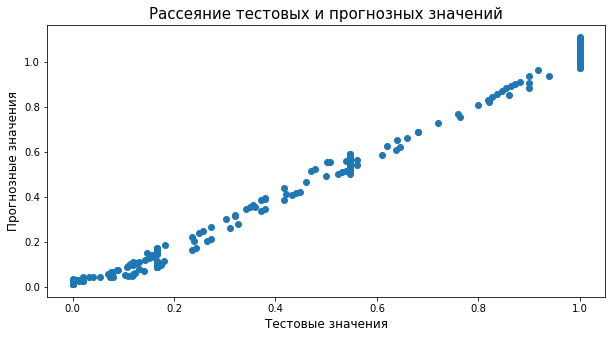

In [108]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_pr, predicted_pr)

In [109]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_pr.evaluate(X_test_pr, y_test_pr)}')

11/11 [==============================] - 0s 1ms/step - loss: 0.0284
Model MAE: 0.028370097279548645


In [110]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_pr-np.mean(y_test_pr)))}')

MAE среднего значения: Прочность при растяжении, МПа    0.332669
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


- Нейронная сеть для предсказания параметра Соотношение матрица-наполнитель

In [111]:
# Назначение переменных для создания модели
x_mn = df.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df[['Соотношение матрица-наполнитель']]
# Разбиение данных на обучающую и тестовую выборки
X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(x_mn, y_mn, test_size=0.3, random_state=5)

In [112]:
# Получение данных в слой, который выполняет нормализацию входных объектов
X_train_mn_norm = normalizer.adapt(np.array(X_train_mn))

In [113]:
# Вид модели - коллекция, стек слоев
model_mn = Sequential(X_train_mn_norm)
# Добавление слоев в модель
model_mn.add(Dense(128))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(128, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(64, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(32, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(16, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(1))
model_mn.add(Activation('selu'))

In [114]:
# Остановка обучения, когда контролируемая метрика перестает улучшаться
early_mn = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [115]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_mn.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [116]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_mn = model_mn.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_mn]
    )

Epoch 1/100
10/10 [==============================] - 2s 27ms/step - loss: 0.7966 - val_loss: 0.2705
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2648 - val_loss: 0.3273
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2108 - val_loss: 0.2305
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1638 - val_loss: 0.2437
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1419 - val_loss: 0.2575
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1348 - val_loss: 0.2763
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1394 - val_loss: 0.2255
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1254 - val_loss: 0.2620
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1160 - val_loss: 0.2025
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1058 - val_loss: 0.1905
Epoch 11

In [117]:
# Вывод архитектуры сети для mn
model_mn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 64)               

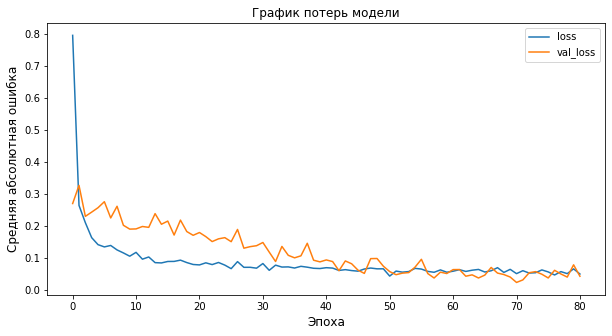

In [118]:
# Построение графика потерь модели
model_loss_plot(history_mn)

11/11 [==============================] - 0s 1ms/step


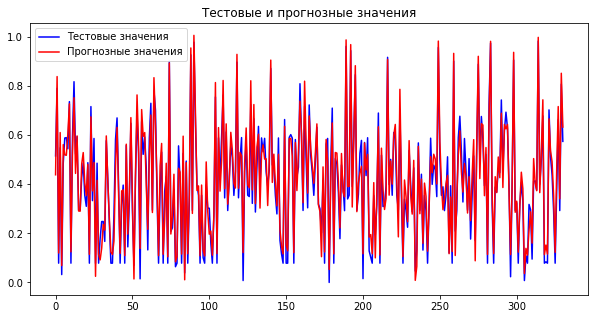

In [119]:
# Построение графика оригинального и прогнозного значения y
pred_mn = model_mn.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pred_mn

actual_and_predicted_plot(original_mn, predicted_mn)

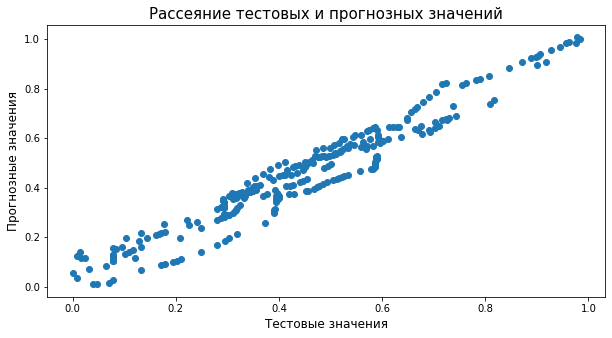

In [120]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_mn, predicted_mn)

In [121]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_mn.evaluate(X_test_mn, y_test_mn)}')

11/11 [==============================] - 0s 1ms/step - loss: 0.0464
Model MAE: 0.04638587310910225


In [122]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_mn-np.mean(y_test_mn)))}')

MAE среднего значения: Соотношение матрица-наполнитель    0.181713
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Вывод: результаты для интерполированного датасета гораздо лучше